# Yelp Business EDA 

## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import 

In [3]:
# Load the preprocessed data
preprocessed_data = pd.read_csv('../data/preprocessed_data.csv')

In [4]:
print(list(preprocessed_data.columns))

['business_id', 'name', 'stars_business', 'stars_review', 'review_count', 'text', 'sentiment']


In [5]:
preprocessed_data

,business_id,name,stars_business,stars_review,review_count,text,sentiment
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,4.0,80,This is nice little Chinese bakery in the hear...,Positive
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,4.0,80,This is the bakery I usually go to in Chinatow...,Positive
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,5.0,80,"A delightful find in Chinatown! Very clean, an...",Positive
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,5.0,80,I ordered a graduation cake for my niece and i...,Positive
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,4.0,80,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,Positive
...,...,...,...,...,...,...,...
687284,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,4.5,5.0,35,Ordered delivery for some tacos on a Saturday ...,Positive
687285,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,4.5,5.0,35,First time trying this restaurant and I had a ...,Positive
687286,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,4.5,5.0,35,This restaurant is truly amazing!!! The owner ...,Positive
687287,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,4.5,4.0,35,Recently got take out from adelita; they were ...,Positive


In [6]:
# Basic statistics for numerical columns
print(preprocessed_data.describe())

       stars_business   stars_review   review_count
count   687289.000000  687289.000000  687289.000000
mean         3.803937       3.811699     622.915501
std          0.575280       1.306959     865.530405
min          1.000000       1.000000       5.000000
25%          3.500000       3.000000     132.000000
50%          4.000000       4.000000     318.000000
75%          4.000000       5.000000     710.000000
max          5.000000       5.000000    5721.000000


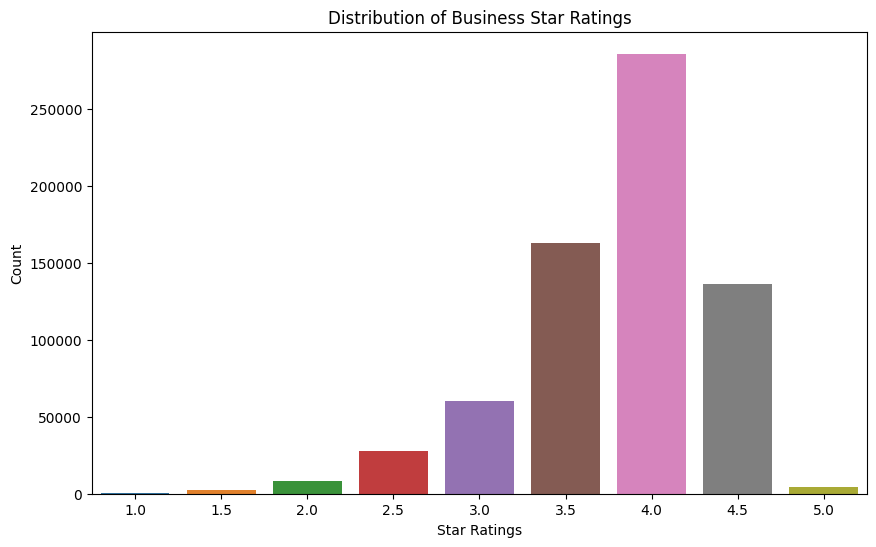

In [7]:
# Distribution of star ratings for businesses
plt.figure(figsize=(10, 6))
sns.countplot(x='stars_business', data=preprocessed_data)
plt.title('Distribution of Business Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


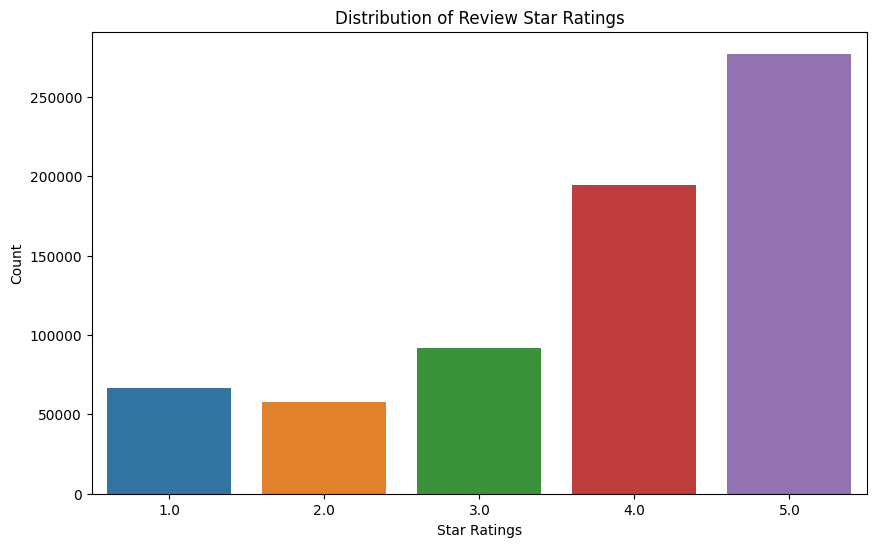

In [8]:
# Distribution of star ratings for reviews
plt.figure(figsize=(10, 6))
sns.countplot(x='stars_review', data=preprocessed_data)
plt.title('Distribution of Review Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()

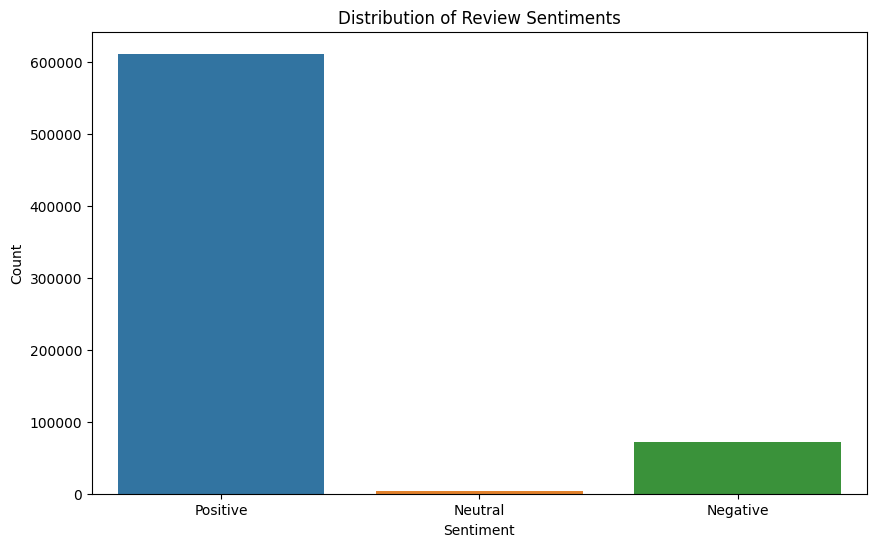

In [9]:
# Distribution of review sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=preprocessed_data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Below; the box plot of the relationship between business star rating and review count gives us an insight into how the number of reviews a business receives is related to its star rating.

From the visualization generated by the EDA code snippet, we can observe the following:

1. Businesses with higher star ratings (4 or 5 stars) tend to have a higher number of reviews compared to businesses with lower star ratings (1 or 2 stars). This suggests that businesses with better ratings are likely to be more popular and attract more customers, resulting in more reviews.

2. The median review count tends to increase as the star rating of businesses increases. This further supports the notion that businesses with better ratings generally receive more reviews.

3. The spread of review count values is quite large for all star ratings, especially for businesses with higher ratings (4 or 5 stars). This indicates that there is a wide range of review counts within each rating category, and some businesses may receive significantly more reviews than others, even if they have similar star ratings.

4. The presence of outliers in the data, particularly for higher-rated businesses, suggests that some businesses have an exceptionally high number of reviews compared to others in the same rating category. These businesses could be very popular or have some unique attributes that make them stand out.

It's important to note that the relationship between business star rating and review count doesn't imply causation. While it's likely that better-rated businesses attract more customers and therefore receive more reviews, there may be other factors at play that influence both the star rating and the number of reviews a business receives.

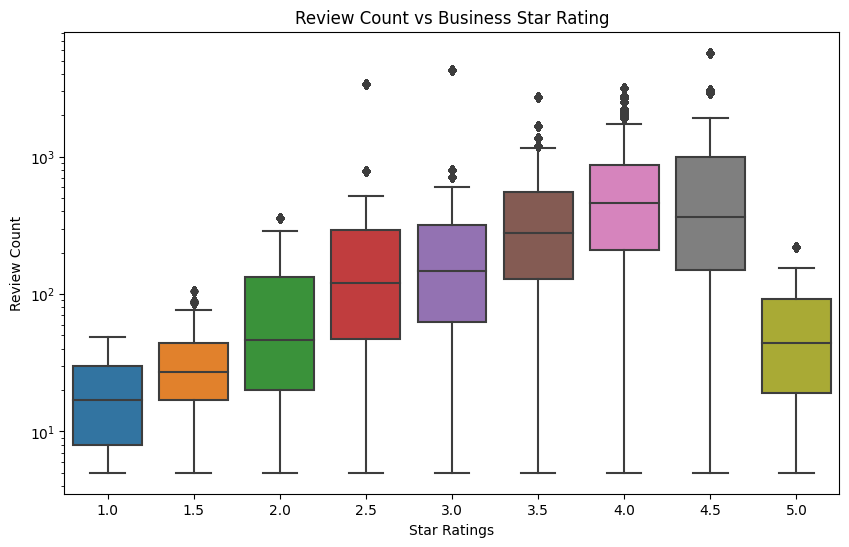

In [10]:
# Relationship between business star rating and review count
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars_business', y='review_count', data=preprocessed_data)
plt.title('Review Count vs Business Star Rating')
plt.xlabel('Star Ratings')
plt.ylabel('Review Count')
plt.yscale('log')
plt.show()

Below, the box plot of the relationship between review star rating and sentiment provides insights into how the sentiment of the reviews (positive, neutral, or negative) corresponds to the star ratings given by users.

From the visualization generated by the EDA code snippet, we can observe the following:

1. Positive sentiment reviews are generally associated with higher star ratings (4 or 5 stars). This suggests that when customers have a positive experience with a business, they are more likely to leave a higher star rating.

2. Negative sentiment reviews are predominantly associated with lower star ratings (1 or 2 stars). This indicates that when customers have a negative experience with a business, they are more likely to leave a lower star rating.

3. Neutral sentiment reviews are typically associated with middle-range star ratings (3 stars). This implies that when customers have an average or mixed experience with a business, they are more likely to leave a moderate star rating.

Overall, the relationship between review star rating and sentiment highlights the correlation between the sentiment expressed in the text of a review and the star rating given by the user. This insight can be useful for businesses to understand the impact of customer sentiment on their star ratings, which in turn can affect their reputation and overall performance. By identifying areas where customers have had negative experiences, businesses can work to improve these aspects and potentially increase their overall star ratings.

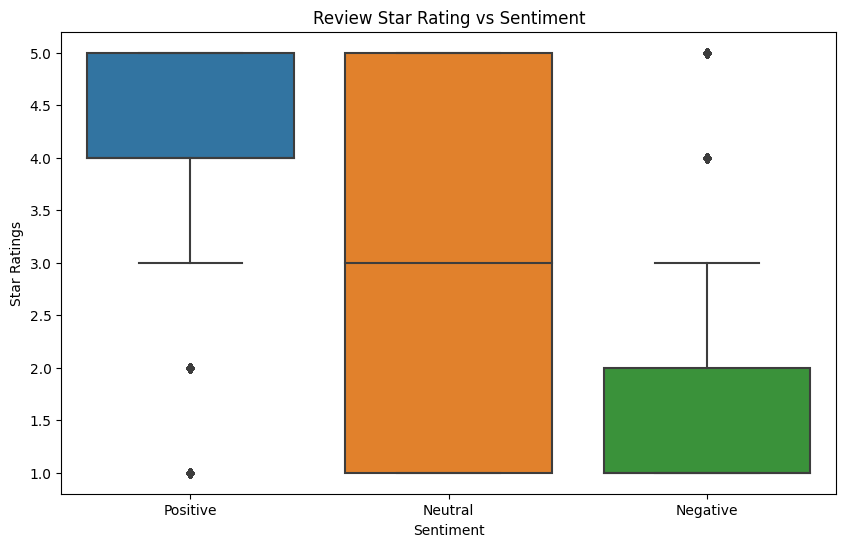

In [11]:
# Relationship between review star rating and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='stars_review', data=preprocessed_data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Review Star Rating vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Star Ratings')
plt.show()

/var/folders/mc/nc2p69nn6ndg77rgmkqn55yr0000gn/T/ipykernel_32286/2163093877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm')


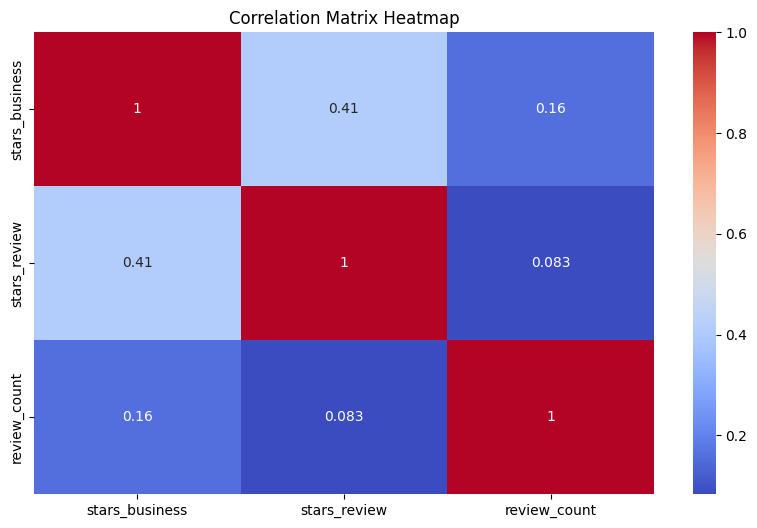

In [12]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()